In [72]:
#Imports!
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


# Dataset Loading

In [73]:
#setting up data!
adult_data = pd.read_csv('adult.csv')
adult_test = pd.read_csv('adult_test.csv', skiprows=1)

print(adult_data.head())
print(adult_test.head())


   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

In [74]:
#cleaning up for future use
Headerlist = ['age','job', 'unknown', 'degree', 'yr', 'marital_status', 'occupation', 
            'relationship', 'race', 'sex', 'capital_gains', 'capital_loss', 
            'hrs_per_week','native_country', 'income']
adult_data.columns = Headerlist 
adult_test.columns = Headerlist


# Graphing data for EDA

<Axes: xlabel='income'>

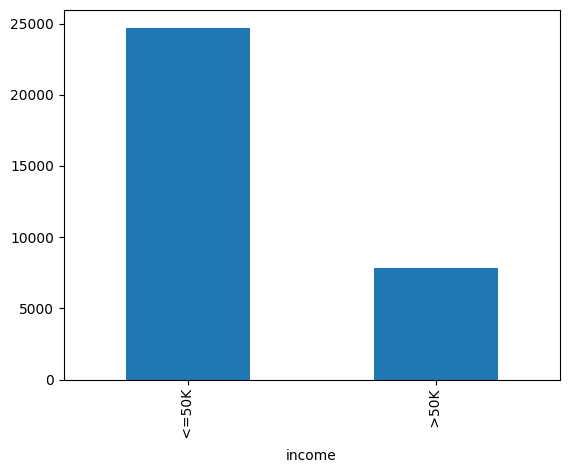

In [75]:
#summarizing for plots
adult_data['income'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'Race Statistics')

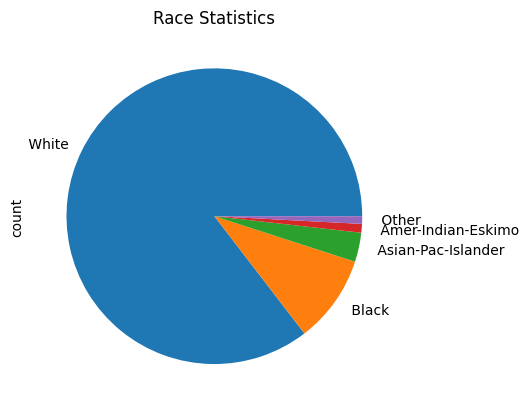

In [76]:
adult_data['race'].value_counts().plot(kind='pie')
plt.title('Race Statistics')

Text(0.5, 1.0, 'Years of Schooling')

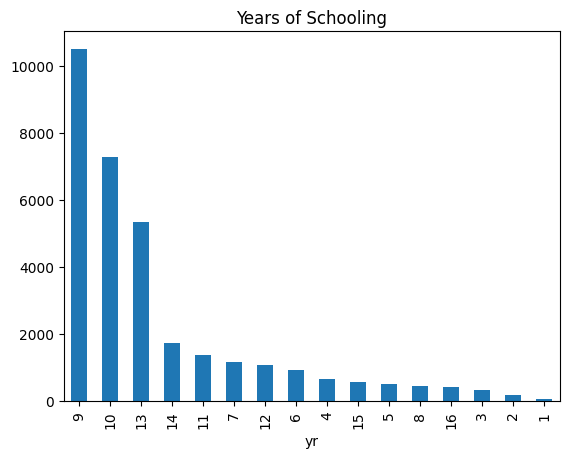

In [77]:
adult_data['yr'].value_counts().plot(kind='bar')
plt.title('Years of Schooling')


Text(0.5, 1.0, 'Sex Distribution')

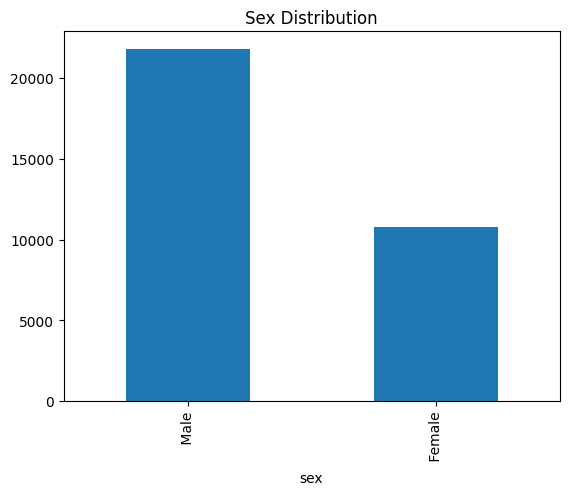

In [78]:
adult_data['sex'].value_counts().plot(kind='bar')
plt.title('Sex Distribution')

C:\Users\chuck\AppData\Local\Temp\ipykernel_7404\1257718360.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=adult_data, x='income', y='age', palette='coolwarm')


Text(0.5, 1.0, 'Income vs. Age')

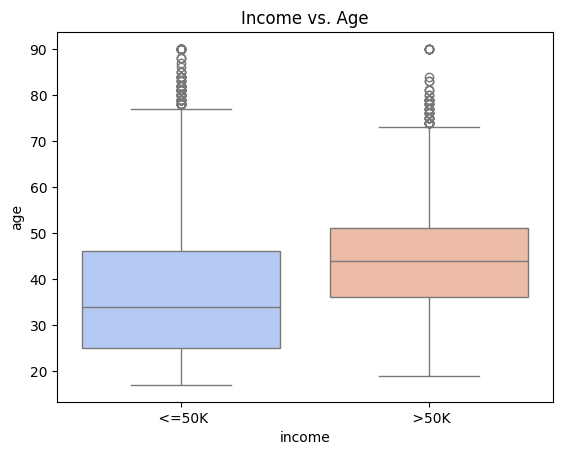

In [79]:
sns.boxplot(data=adult_data, x='income', y='age', palette='coolwarm')
plt.title('Income vs. Age')


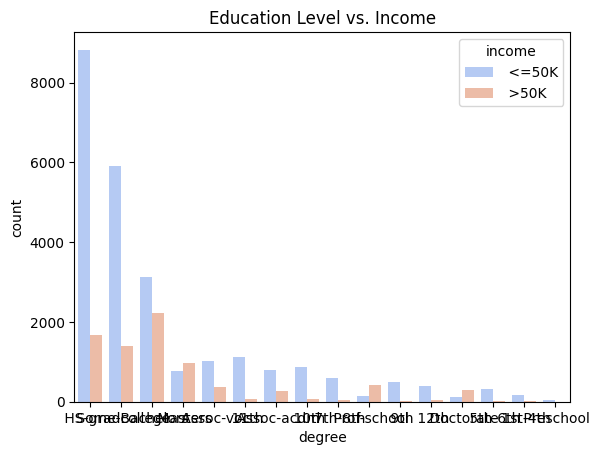

In [80]:
sns.countplot(data=adult_data, x='degree', hue='income', palette='coolwarm', order=adult_data['degree'].value_counts().index)
plt.title('Education Level vs. Income')
plt.show()

C:\Users\chuck\AppData\Local\Temp\ipykernel_7404\1328640009.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=adult_data, x='income', y='hrs_per_week', palette='coolwarm')


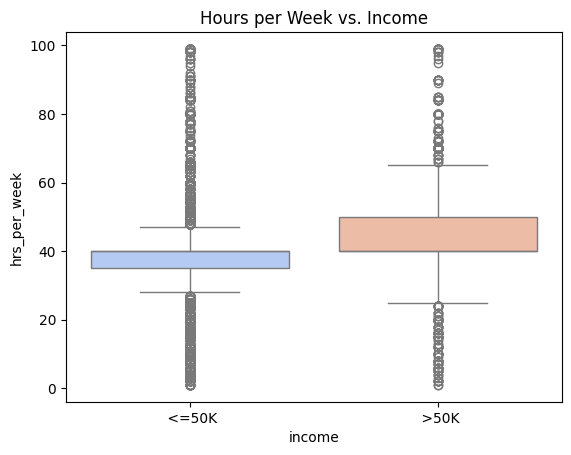

In [81]:
sns.boxplot(data=adult_data, x='income', y='hrs_per_week', palette='coolwarm')
plt.title('Hours per Week vs. Income')
plt.show()

## Some insights:

The data is a pretty bad sample: a lot of white men. But - this does not mean that there is no way to figure out any imporant insights. Most people make under 50k a year, and trying to figure out what makes people more likely to make more money seems to be a good use of the dataset. There are a couple hypotheses I can test here. 

# Hypothesis: Men on average are more likely to make more than 50k per year than women.
I'm not looking at causation, just correlation. 

(21789, 15) (10771, 15)


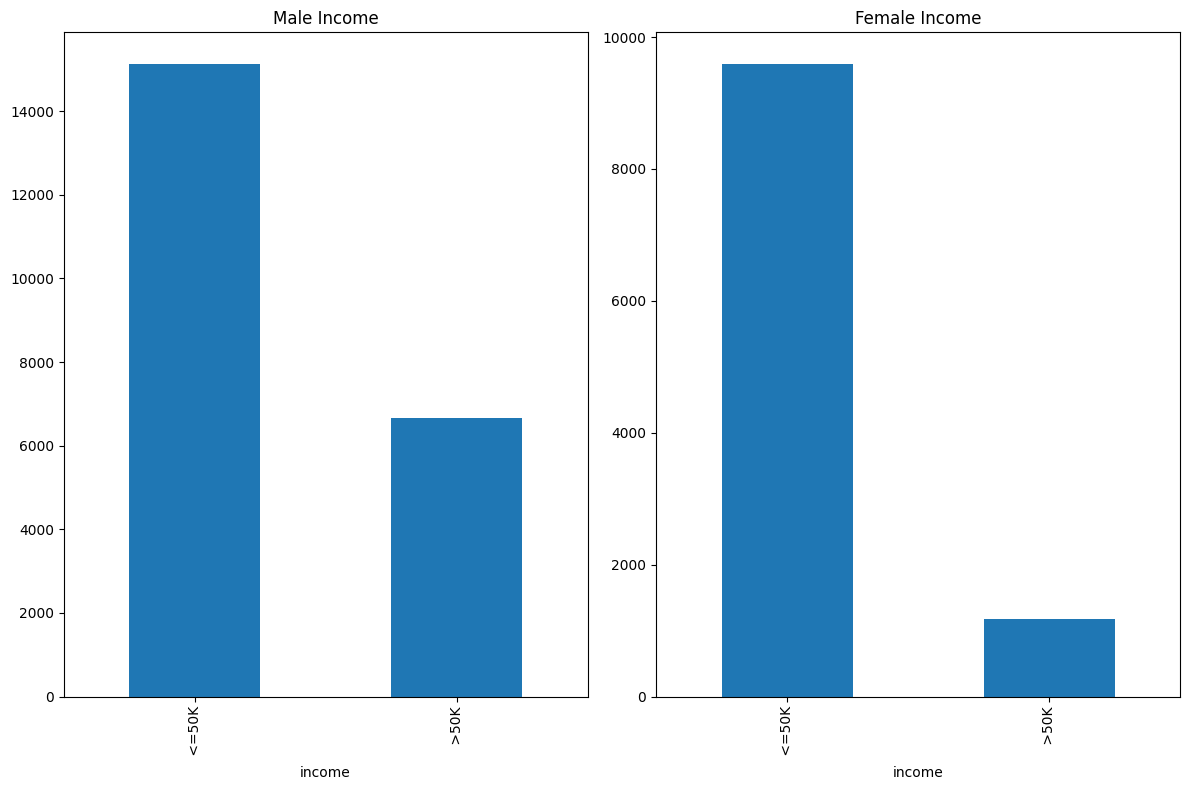

In [82]:
# Filter data by gender
male_dat = adult_data[adult_data['sex'] == ' Male']
female_dat = adult_data[adult_data['sex'] == ' Female']
print(male_dat.shape, female_dat.shape)  # Check if filtering works

fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Male income distribution
male_dat['income'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Male Income')

# Female income distribution
female_dat['income'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title('Female Income')

plt.tight_layout()
plt.show()


In [83]:
#P val analysis

cont_table = pd.crosstab(adult_data['sex'], adult_data['income'])
print(cont_table)

chi2_stat, p_val, dof, expected = chi2_contingency(cont_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

income  <=50K  >50K
sex                
Female   9592  1179
Male    15127  6662
Chi-Square Statistic: 1517.9756145144036
P-Value: 0.0
Degrees of Freedom: 1
Expected Frequencies Table:
[[ 8177.16059582  2593.83940418]
 [16541.83940418  5247.16059582]]


# So women make less than men on average!

This is shown by a very low P value of near zero. The graph also visually supports this. Obviously, causation is not displayed here but there is a clear and obvious difference between income in male and female individuals. Accoring to the Chi-squared distribution youd expect nearly _Twice!!_ as many women to make more than 50k a year

# Hypotheses: Married couples are more likely to make more money!

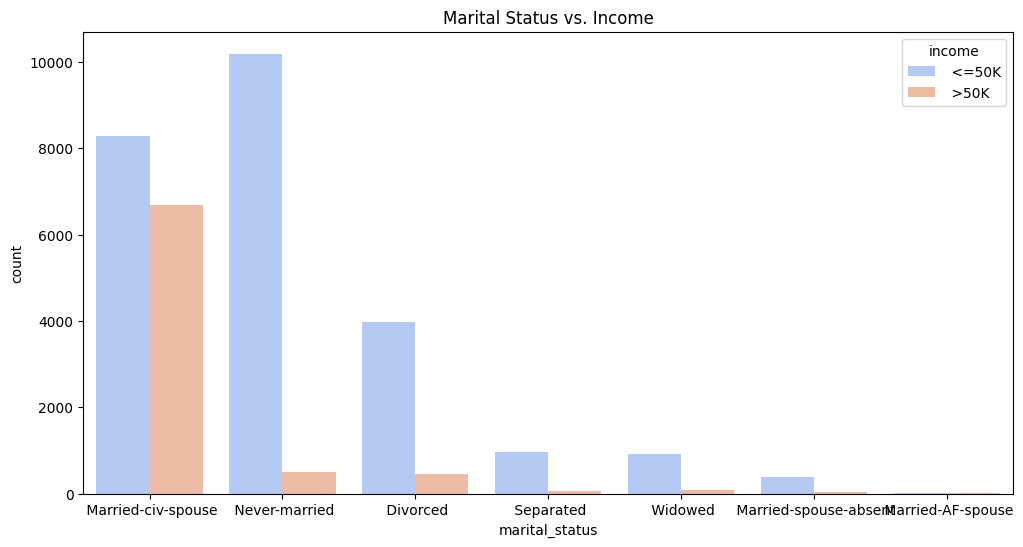

In [84]:
plt.figure(figsize=(12, 6))  # Set figure size for readability

sns.countplot(data=adult_data, x='marital_status', hue='income', palette='coolwarm', order=adult_data['marital_status'].value_counts().index)
plt.title('Marital Status vs. Income')
plt.show()

In [85]:
#P val analysis

cont_table = pd.crosstab(adult_data['marital_status'], adult_data['income'])
print(cont_table)

chi2_stat, p_val, dof, expected = chi2_contingency(cont_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

income                 <=50K  >50K
marital_status                    
Divorced                3980   463
Married-AF-spouse         13    10
Married-civ-spouse      8284  6692
Married-spouse-absent    384    34
Never-married          10191   491
Separated                959    66
Widowed                  908    85
Chi-Square Statistic: 6517.299336300969
P-Value: 0.0
Degrees of Freedom: 6
Expected Frequencies Table:
[[3.37305028e+03 1.06994972e+03]
 [1.74612101e+01 5.53878993e+00]
 [1.13695253e+04 3.60647469e+03]
 [3.17338514e+02 1.00661486e+02]
 [8.10959330e+03 2.57240670e+03]
 [7.78162623e+02 2.46837377e+02]
 [7.53868765e+02 2.39131235e+02]]


# So again, married people make more money on average. 
We can draw this conclusion - partially visually (the graph shows a very very high correlation between being happily married and making a lot of money) but also in the p_value being close to zero (python rounding is my roman empire). There is a clear correlation. Causation is not shown at all, again, but it could be interesting to research. 

# Extra fun: So what are some predictors of income?
Im removing some values here that I either don't understand (probably labels) or because I think they are too obvious. 

In [86]:
adult_data['income'] = adult_data['income'].map({' <=50K': 0, ' >50K': 1})
adult_test['income'] = adult_test['income'].map({' <=50K.': 0, ' >50K.': 1})


In [87]:
train_labels = adult_data['income']
test_labels = adult_test['income']

categorical_cols = adult_data.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    adult_data[col] = le.fit_transform(adult_data[col])
    adult_test[col] = le.transform(adult_test[col])  
    label_encoders[col] = le 
train_dat = adult_data.drop('income', axis=1)
train_dat =train_dat.drop('unknown', axis=1)
train_dat = train_dat.drop('capital_gains', axis=1)
train_dat = train_dat.drop('capital_loss', axis=1)

test_dat = adult_test.drop('income', axis=1)
test_dat =test_dat.drop('unknown', axis=1)
test_dat = test_dat.drop('capital_gains', axis=1)
test_dat = test_dat.drop('capital_loss', axis=1)


In [88]:
print(train_labels)

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income, Length: 32560, dtype: int64


In [89]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(train_dat, train_labels)

# Predict the income for the test set
predictions = forest.predict(test_dat)
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 81.80%


In [90]:
#importance:
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

names = train_dat.columns

print("Feature ranking:")

for f in range(train_dat.shape[1]):
    print(f"{f + 1}. {names[indices[f]]} ({importances[indices[f]]})")


Feature ranking:
1. age (0.26696679654329186)
2. hrs_per_week (0.13690977866043355)
3. relationship (0.11863619490571337)
4. yr (0.1174562575173181)
5. occupation (0.10494599567829185)
6. marital_status (0.08591715478029198)
7. job (0.06121195264153534)
8. degree (0.042200355552163005)
9. native_country (0.02625863344399079)
10. race (0.022183210764161472)
11. sex (0.017313669512808678)


# Interesing results
This model is way more simple and should not be taken as "this is what leads to higher income" but certainly leads one to ask questions. An accuracy of 80% ish for the dataset is also pretty good. I would be interested to see if there are any more factors that might lead into predicting income? Of note: there are many insights we can't get: I'd wager that someone who makes more money is more likely to marry... but one who is higher educated makes more money. All that is to say - NO CAUSATION